In [33]:

#####  https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\MUR2HO\Data\Features\Merged_Features_Spindle_W2_and_W3_all.csv', encoding = 'ISO-8859-1', sep=';')

y = pd.read_csv(r'C:\Users\MUR2HO\Data\HPC\Qs Daten_04.10_18_19.02_11.06_Durchmesser und Konzentrizitaet_paarweise_vertauscht.csv', encoding = 'ISO-8859-1', sep=';')
y = y.T[1:4].T  ##Diameter Zeiss
#y = y.T[3:4].T  ##Concentricity

In [84]:
df=pd.concat([y, data],ignore_index=False,axis=1)
df.drop(["Diameter (mean) Stotz"], axis = 1)

cor = df.corr(method ='pearson') ### method = pearson : standard correlation coefficient, 
                                              ##kendall : Kendall Tau correlation coefficient
                                              ##spearman : Spearman rank correlation


#Correlation with target

#cor_target = abs(cor["Concentricity"]) #Selecting highly correlated features
cor_target = abs(cor["Diameter (mean) Zeiss"]) #Selecting highly correlated features
highcor_features = cor_target[cor_target>0.2] ### threshold 0.45
highcor_frame = highcor_features.to_frame()  ###convert series to dataframe
hcr = highcor_frame.T
hcr.drop(hcr.iloc[:, :2], inplace=True, axis=1) ### drop 'Diameter Zeiss' column
hcr=list(hcr.columns)   ##### get list of all the column names (features) whose Correlation coefficient is > 0.5
highcor_features

Diameter (mean) Zeiss     1.000000
Diameter (mean) Stotz     0.882930
Spindle_W2_mean           0.617039
Spindle_W2_std            0.560806
Spindle_W2_kurtosis       0.480468
Spindle_W2_skew           0.483541
Spindle_W2_RMS            0.592794
Spindle_W2_CrestFactor    0.330812
Spindle_W2_ShapeFactor    0.284545
Spindle_W2_PKM            0.588873
Spindle_W2_Energy         0.552873
Spindle_W2_MF             0.493246
Spindle_W2_MBP            0.506274
Spindle_W2_VBP            0.486342
Spindle_W2_MaxBP          0.507380
Spindle_W2_KUBP           0.424767
Spindle_W2_SKBP           0.414172
Spindle_W3_kurtosis       0.416331
Spindle_W3_skew           0.483541
Spindle_W3_CrestFactor    0.395238
Spindle_W3_PKM            0.531535
Spindle_W3_Energy         0.284491
Spindle_W3_MF             0.289117
Spindle_W3_MBP            0.546077
Spindle_W3_VBP            0.455726
Spindle_W3_MaxBP          0.507380
Spindle_W3_KUBP           0.581764
Spindle_W3_SKBP           0.595356
Name: Diameter (mean

In [85]:
len(highcor_features)-2

26

In [86]:
# Selects only the features with correlation coeffient > 0.5 and copies into the separate .csv file

dfs = data[hcr] ######select only the features which are mentioned in the list from merged-all features file

dfs.to_csv(r'C:/Users/MUR2HO/Data/Features/PearsonCorr_Top25_ranked_features.csv', index=False, sep=";")
dfs

,Spindle_W2_mean,Spindle_W2_std,Spindle_W2_kurtosis,Spindle_W2_skew,Spindle_W2_RMS,Spindle_W2_CrestFactor,Spindle_W2_ShapeFactor,Spindle_W2_PKM,Spindle_W2_Energy,Spindle_W2_MF,...,Spindle_W3_skew,Spindle_W3_CrestFactor,Spindle_W3_PKM,Spindle_W3_Energy,Spindle_W3_MF,Spindle_W3_MBP,Spindle_W3_VBP,Spindle_W3_MaxBP,Spindle_W3_KUBP,Spindle_W3_SKBP
0,-12.193897,10.649121,-1.162746,-0.438143,16.189345,-0.111184,1.327660,7.004554,226.656474,0.010052,...,-0.438143,-0.509271,0.094239,0.073111,0.000825,0.000054,7.257916e-07,13.206536,420.966237,20.084882
1,-11.755397,10.242050,-0.992643,-0.476852,15.591310,-0.115449,1.326311,6.805400,209.425580,0.009713,...,-0.476852,-0.404137,0.086048,0.074864,0.000817,0.000054,7.365246e-07,15.179004,422.885864,20.130731
2,-11.729219,10.276498,-1.155738,-0.426813,15.594262,-0.109014,1.329523,6.869305,211.044750,0.009899,...,-0.426813,-0.480726,0.126115,0.119520,0.000877,0.000085,1.895787e-06,12.382491,429.510490,20.306091
3,-12.190829,10.736817,-1.034028,-0.479729,16.244862,-0.104648,1.332548,7.131964,230.142244,0.010157,...,-0.479729,-0.375023,0.127849,0.135115,0.000891,0.000101,2.703576e-06,16.173268,430.311656,20.329289
4,-11.346000,9.920109,-0.887175,-0.502576,15.071174,-0.119433,1.328325,6.332192,196.771164,0.009513,...,-0.502576,-0.467711,0.093481,0.069048,0.000798,0.000051,6.742675e-07,12.576803,427.883804,20.278191
5,-11.734068,10.278437,-0.941907,-0.493043,15.599187,-0.115391,1.329393,6.677522,211.232834,0.009808,...,-0.493043,-0.466942,0.089667,0.071719,0.000594,0.000057,8.139647e-07,13.555123,422.259980,20.121666
6,-11.337884,9.949515,-0.804325,-0.529863,15.084444,-0.112699,1.330446,6.468488,197.983760,0.009553,...,-0.529863,-0.460688,0.124227,0.112626,0.000844,0.000085,1.886554e-06,12.388623,429.833413,20.321725
7,-12.053192,10.522150,-1.114565,-0.440729,15.999846,-0.106251,1.327436,6.808972,221.321553,0.010010,...,-0.440729,-0.460491,0.125128,0.115686,0.000644,0.000085,1.893091e-06,13.401958,428.394119,20.277230
8,-11.718822,10.255421,-0.900795,-0.504175,15.572554,-0.115588,1.328850,6.729349,210.338681,0.009752,...,-0.504175,-0.508381,0.096135,0.070830,0.000761,0.000054,7.475960e-07,12.676220,424.573881,20.192122
9,-11.657589,10.208117,-0.899584,-0.503180,15.495323,-0.116164,1.329205,6.694438,208.256434,0.009743,...,-0.503180,-0.423488,0.086117,0.076144,0.000792,0.000057,8.124264e-07,14.954630,414.172322,19.875363


In [7]:
hcr

['Spindle_W2_mean',
 'Spindle_W2_std',
 'Spindle_W2_RMS',
 'Spindle_W2_PKM',
 'Spindle_W2_Energy',
 'Spindle_W2_MBP',
 'Spindle_W2_MaxBP',
 'Spindle_W3_PKM',
 'Spindle_W3_MBP',
 'Spindle_W3_MaxBP',
 'Spindle_W3_KUBP',
 'Spindle_W3_SKBP']

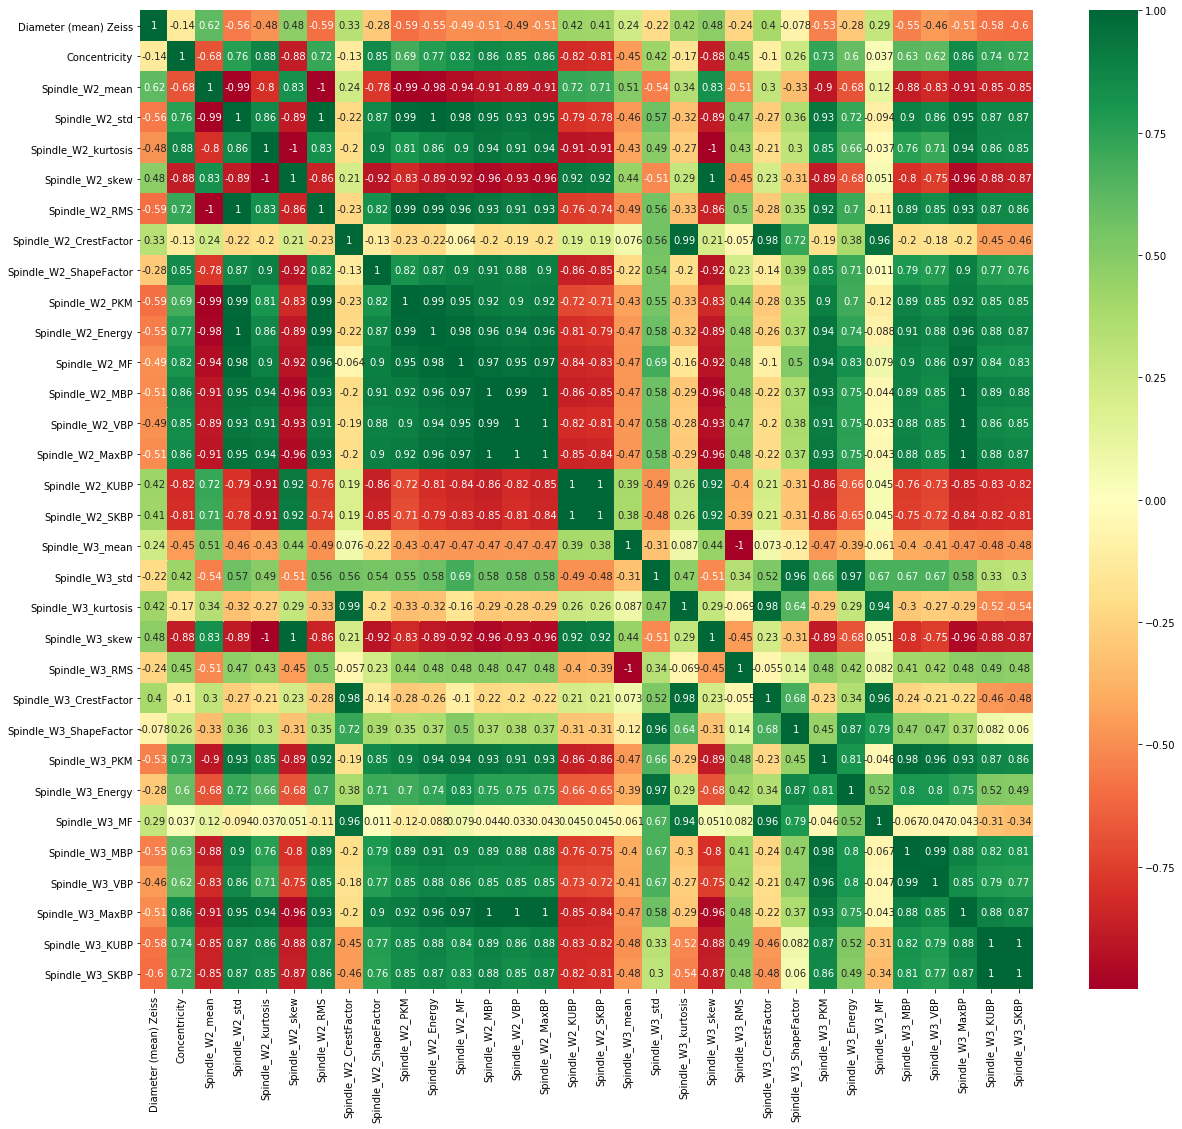

In [31]:
plt.figure(figsize=(20,18))
df1 = df.drop(["Diameter (mean) Stotz"], axis = 1)
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()